In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your custom modules to the Python path
sys.path.append('C:/Users/LENOVO/Desktop/Fitness Tracker/modules/')

# Import your custom functions
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction
from FrequencyAbstraction import FourierTransformation
from sklearn.cluster import  kmeans_plusplus
from sklearn.cluster import KMeans


In [2]:
#Load the Dataset
df = pd.read_pickle("interin/02_outliers_removed_chauvenets.pkl")
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [3]:
predictor_columns = list(df.columns[:6])
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

In [4]:
#Plot Settings 
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

# Dealing with the missing values (Data)

In [5]:
for col in predictor_columns : 
    df[col] = df [col].interpolate()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 739.0+ KB


# Calculate the set Durtion

<Axes: xlabel='epoch (ms)'>

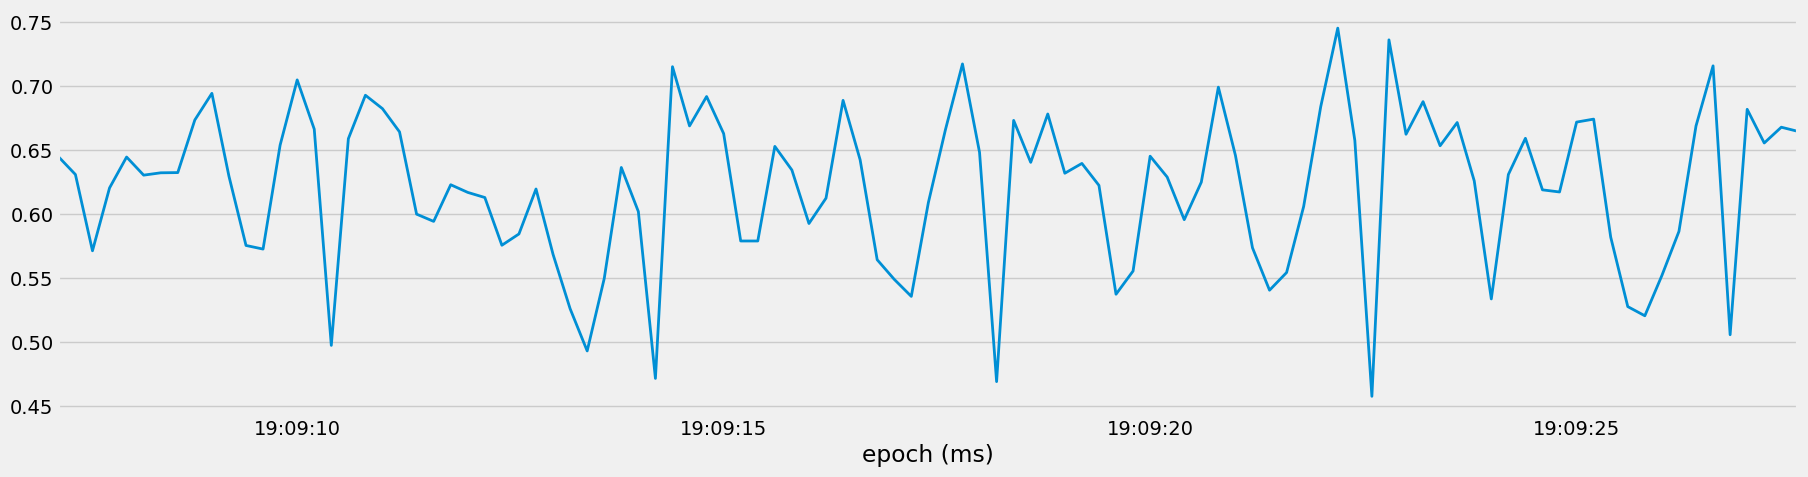

In [7]:
df[df["set"] == 25]["acc_y"].plot()

<Axes: xlabel='epoch (ms)'>

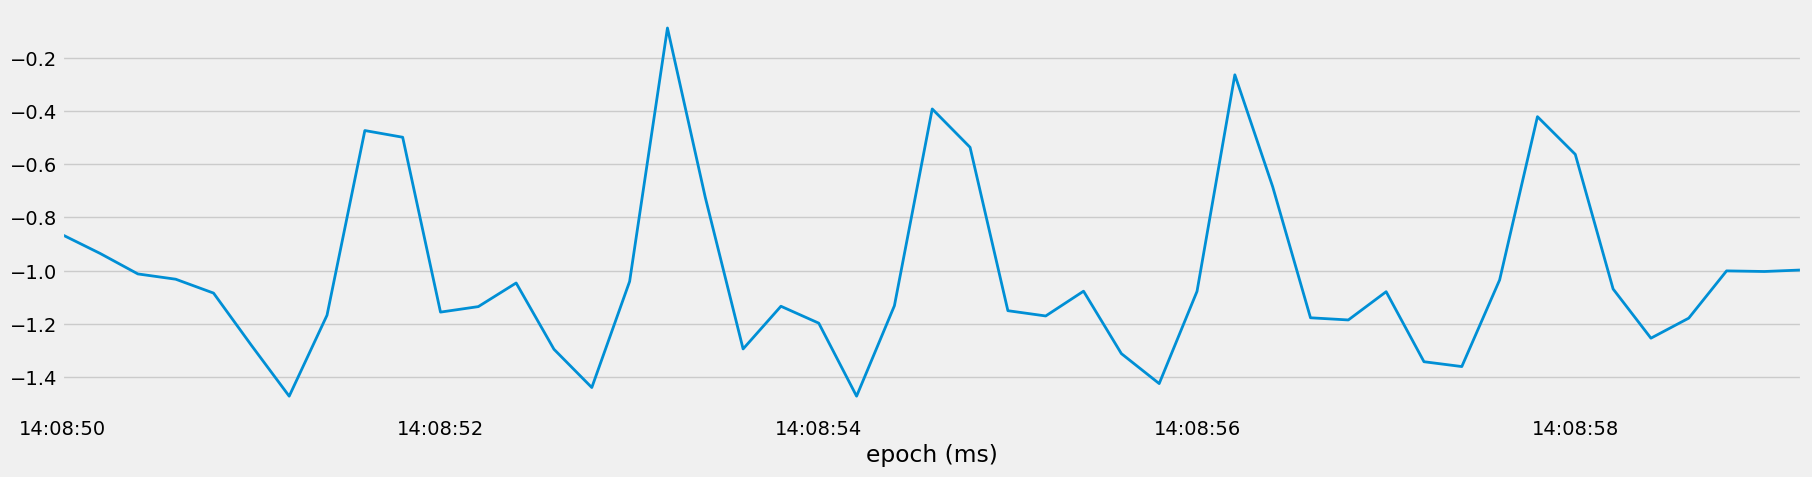

In [8]:
df[df["set"] == 50]["acc_y"].plot()

In [9]:
duration = df[df["set"] == 1].index[-1] - df[df["set"] == 1].index[0]
duration.seconds

16

In [10]:
for s in df["set"].unique():
    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]
    duration = stop - start
    df.loc[(df["set"] == s),"duration"]= duration.seconds

In [11]:
duration_df = df.groupby(["category"])["duration"].mean()
duration_df

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

# Butterworth lowpass filter

In [12]:
df_lowpass = df.copy() 
LowPass = LowPassFilter()

In [13]:
fs = 1000/200
fs
cutoff= 1.3

In [14]:
df_lowpass =LowPass.low_pass_filter(df_lowpass , "acc_y" , fs , cutoff , order = 5 )
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0,0.977003
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0,0.973169
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0,0.966879
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0,0.962244
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0,0.959572
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0,-0.988153
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0,-1.053448
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0,-1.044737


In [15]:
subset = df_lowpass[df_lowpass["set"] == 45]
print (subset ["label"][0])
subset

ohp


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3552\4236305866.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print (subset ["label"][0])


,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-14 13:54:34.800,-0.058500,1.412000,0.003167,-0.24400,10.3902,-22.8172,C,ohp,heavy,45,15.0,1.296082
2019-01-14 13:54:35.000,-0.202000,1.180333,0.101333,39.34160,24.2865,-85.0976,C,ohp,heavy,45,15.0,1.162959
2019-01-14 13:54:35.200,-0.297500,0.640500,0.199500,-16.15860,38.1828,22.1830,C,ohp,heavy,45,15.0,0.787794
2019-01-14 13:54:35.400,-0.232333,0.759667,0.157667,-1.68300,5.7682,75.4634,C,ohp,heavy,45,15.0,0.570622
2019-01-14 13:54:35.600,-0.081500,0.513500,0.028500,16.40240,-5.8048,27.0122,C,ohp,heavy,45,15.0,0.684666
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:54:49.600,-0.322000,0.800500,0.046500,11.04900,-19.2316,-33.7560,C,ohp,heavy,45,15.0,0.783557
2019-01-14 13:54:49.800,-0.394667,0.811333,0.061667,12.65860,-23.6706,-12.1338,C,ohp,heavy,45,15.0,0.810322
2019-01-14 13:54:50.000,-0.400000,0.920500,0.117000,27.34140,-40.7318,53.9024,C,ohp,heavy,45,15.0,0.907215


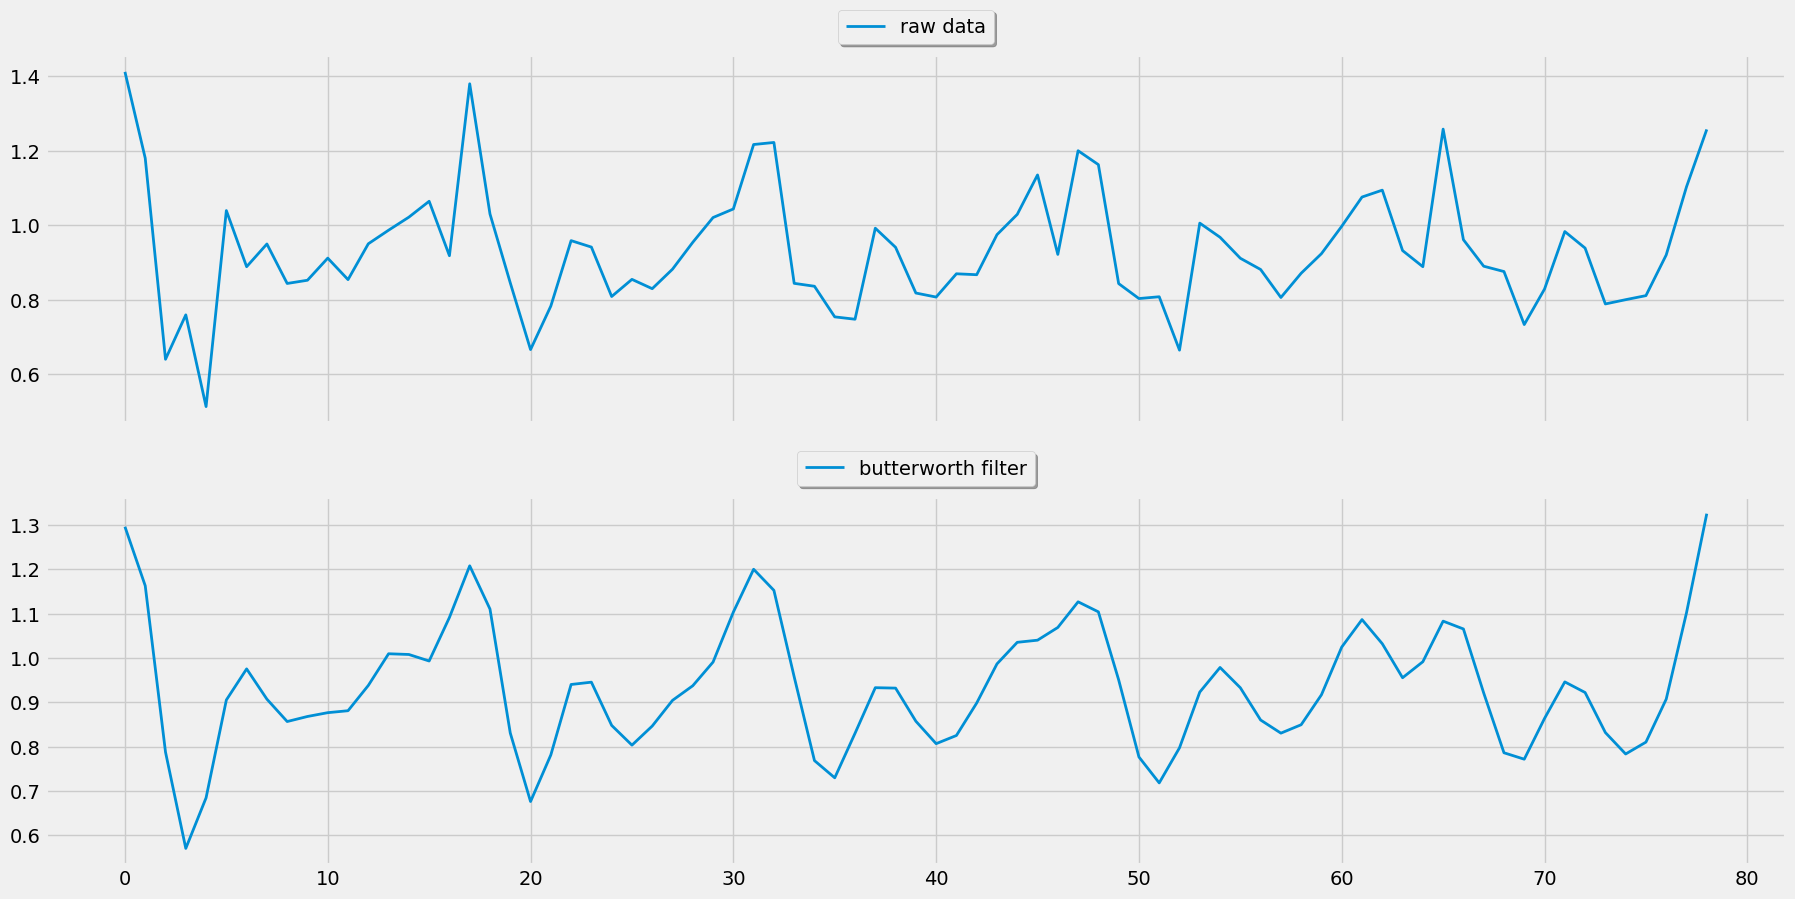

In [16]:
fig , ax = plt.subplots(nrows = 2,sharex = True , figsize = (20,10))
ax[0].plot(subset["acc_y"].reset_index(drop = True),label = "raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop = True),label = "butterworth filter")
ax[0].legend(loc = "upper center" , bbox_to_anchor = (0.5 , 1.15) , fancybox = True , shadow = True)
ax[1].legend(loc = "upper center" , bbox_to_anchor = (0.5 , 1.15) , fancybox = True , shadow = True)

In [17]:
for col in predictor_columns :
    df_lowpass = LowPass.low_pass_filter(df_lowpass,col,fs,cutoff,order=5)
    df_lowpass[col] = df_lowpass[col + "_lowpass"]
    del df_lowpass[col + "_lowpass"]

In [18]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0


# Principal Component Analysis

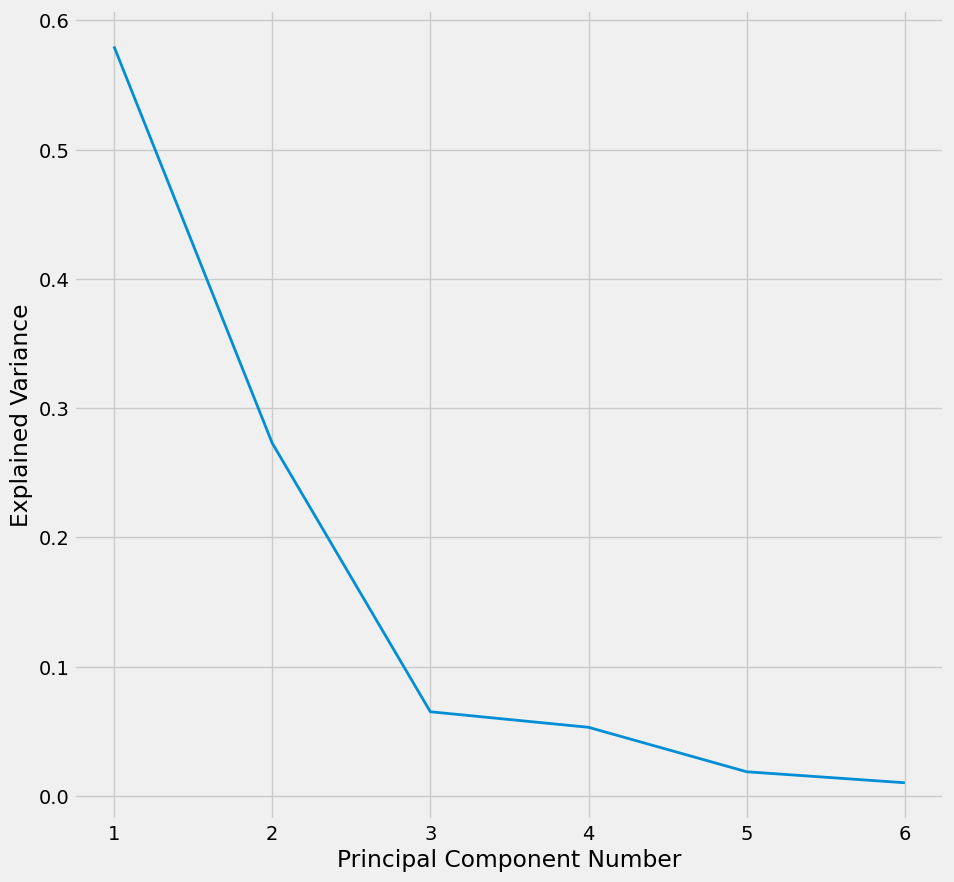

In [19]:
df_pca = df_lowpass.copy()
PCA = PrincipalComponentAnalysis()
pc_values = PCA.determine_pc_explained_variance(df_pca,predictor_columns)
plt.figure(figsize=(10,10))
plt.plot(range(1,len(predictor_columns) + 1 ),pc_values)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance")
plt.show()

In [20]:
df_pca = PCA.apply_pca(df_pca , predictor_columns , 3)
df_pca

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.315889,-0.075461,0.072243
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.314873,-0.073888,0.069825
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.314236,-0.080343,0.066219
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.314356,-0.090852,0.061839
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.313630,-0.097479,0.062974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.349351,-0.148450,-0.053031
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.371610,-0.151455,-0.058498
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.368098,-0.153153,-0.058772


<Axes: xlabel='epoch (ms)'>

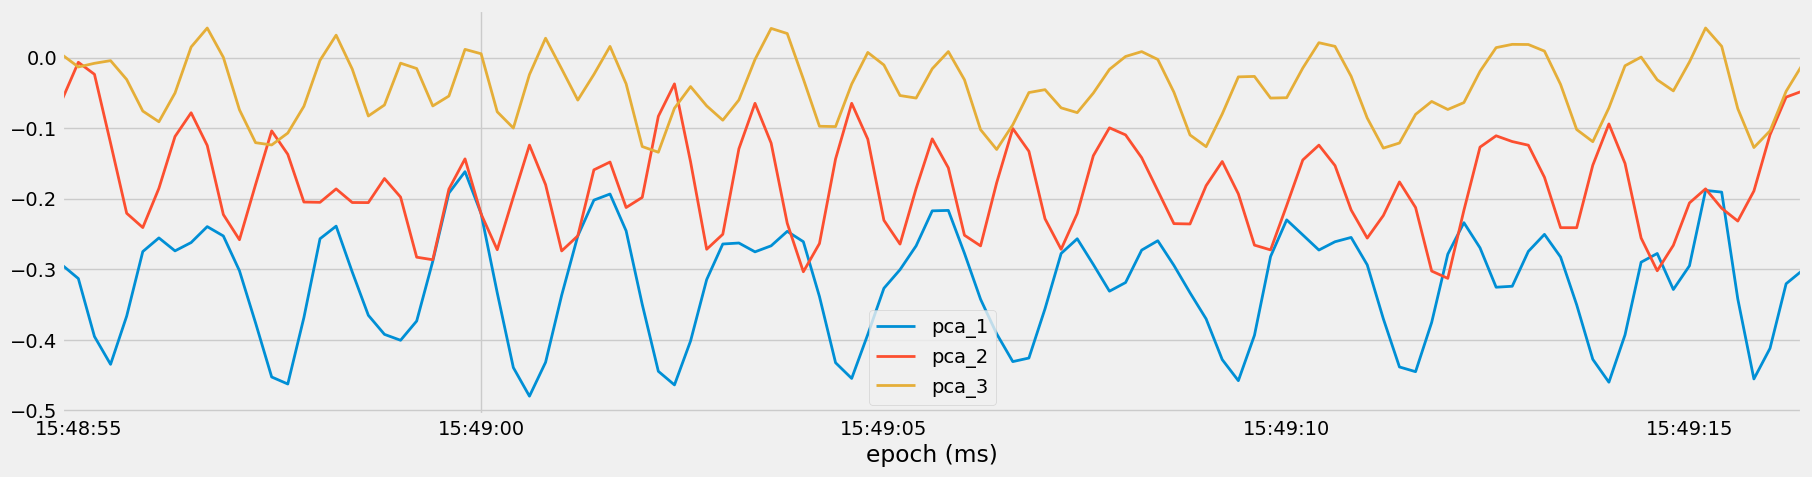

In [21]:
subset = df_pca[df_pca["set"] == 35]
subset[["pca_1", "pca_2" , "pca_3"]].plot()

In [22]:
subset

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:48:54.800,-0.094396,0.891041,-0.005994,-2.338054,-3.884629,1.745296,B,ohp,medium,35,21.0,-0.294343,-0.059385,0.003727
2019-01-11 15:48:55.000,-0.093845,0.953323,0.080001,-3.814675,-2.375120,4.447539,B,ohp,medium,35,21.0,-0.313398,-0.006771,-0.013395
2019-01-11 15:48:55.200,-0.133457,1.182284,0.049543,0.341722,-5.827977,-14.474650,B,ohp,medium,35,21.0,-0.395533,-0.023779,-0.008200
2019-01-11 15:48:55.400,-0.214620,1.266713,-0.097444,1.836545,-15.200894,-38.378502,B,ohp,medium,35,21.0,-0.435004,-0.121345,-0.004419
2019-01-11 15:48:55.600,-0.297162,1.034657,-0.229331,-8.084908,-15.295883,-34.485185,B,ohp,medium,35,21.0,-0.366605,-0.220814,-0.031165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:49:15.600,-0.351624,0.948756,-0.227174,-20.037197,-17.034945,1.458312,B,ohp,medium,35,21.0,-0.342327,-0.231862,-0.072531
2019-01-11 15:49:15.800,-0.424993,1.266271,-0.151429,-47.826553,-23.376297,24.493841,B,ohp,medium,35,21.0,-0.455707,-0.189263,-0.127620
2019-01-11 15:49:16.000,-0.335881,1.171543,-0.035990,-28.663875,-19.242887,14.107873,B,ohp,medium,35,21.0,-0.412323,-0.109535,-0.104000


# Sum of Squares Attributes

In [23]:
df_squared = df_pca.copy()
acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2  + df_squared["acc_z"] ** 2
gyr_r = df_squared["gyr_x"] ** 2 + df_squared["gyr_y"] ** 2  + df_squared["gyr_z"] ** 2


In [24]:
acc_r

epoch (ms)
2019-01-11 15:08:05.200    0.959758
2019-01-11 15:08:05.400    0.951550
2019-01-11 15:08:05.600    0.940095
2019-01-11 15:08:05.800    0.933694
2019-01-11 15:08:06.000    0.930633
                             ...   
2019-01-20 17:33:27.000    0.982231
2019-01-20 17:33:27.200    1.115630
2019-01-20 17:33:27.400    1.098133
2019-01-20 17:33:27.600    1.027507
2019-01-20 17:33:27.800    1.076688
Length: 9009, dtype: float64

In [25]:
gyr_r

epoch (ms)
2019-01-11 15:08:05.200    10.384526
2019-01-11 15:08:05.400     0.360211
2019-01-11 15:08:05.600    24.492348
2019-01-11 15:08:05.800    34.847803
2019-01-11 15:08:06.000     5.260569
                             ...    
2019-01-20 17:33:27.000    20.328548
2019-01-20 17:33:27.200    18.397341
2019-01-20 17:33:27.400     5.426886
2019-01-20 17:33:27.600    15.173048
2019-01-20 17:33:27.800    18.335044
Length: 9009, dtype: float64

In [26]:
df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyr_r"] = np.sqrt(gyr_r)


In [27]:
df_squared["acc_r"]

epoch (ms)
2019-01-11 15:08:05.200    0.979672
2019-01-11 15:08:05.400    0.975474
2019-01-11 15:08:05.600    0.969585
2019-01-11 15:08:05.800    0.966278
2019-01-11 15:08:06.000    0.964693
                             ...   
2019-01-20 17:33:27.000    0.991076
2019-01-20 17:33:27.200    1.056234
2019-01-20 17:33:27.400    1.047919
2019-01-20 17:33:27.600    1.013660
2019-01-20 17:33:27.800    1.037636
Name: acc_r, Length: 9009, dtype: float64

In [28]:
df_squared["gyr_r"]

epoch (ms)
2019-01-11 15:08:05.200    3.222503
2019-01-11 15:08:05.400    0.600176
2019-01-11 15:08:05.600    4.948974
2019-01-11 15:08:05.800    5.903203
2019-01-11 15:08:06.000    2.293593
                             ...   
2019-01-20 17:33:27.000    4.508719
2019-01-20 17:33:27.200    4.289212
2019-01-20 17:33:27.400    2.329568
2019-01-20 17:33:27.600    3.895260
2019-01-20 17:33:27.800    4.281944
Name: gyr_r, Length: 9009, dtype: float64

In [29]:
subset = df_squared[df_squared["set"] == 14]

In [30]:
df_squared

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.368098,-0.153153,-0.058772,1.047919,2.329568


array([<Axes: xlabel='epoch (ms)'>, <Axes: xlabel='epoch (ms)'>],
      dtype=object)

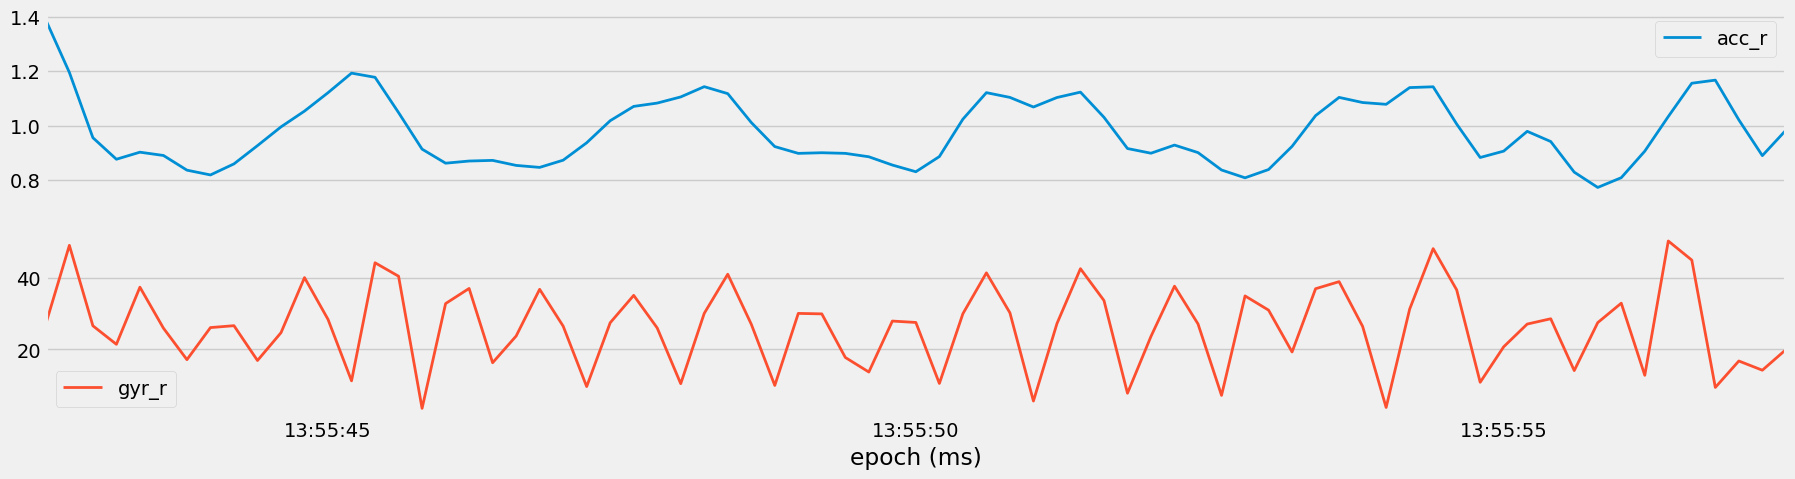

In [31]:
subset[["acc_r" , "gyr_r"]].plot(subplots = True)

In [32]:
df_squared = df_squared.drop(columns=['duration'])


In [33]:
df_squared

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,-0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,-0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,-0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,-0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,-0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,0.368098,-0.153153,-0.058772,1.047919,2.329568


# Temporal Abstraction

In [34]:
df_temporal = df_squared.copy()
NumAbs = NumericalAbstraction()

In [35]:
df_temporal

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,-0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,-0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,-0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,-0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,-0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,0.368098,-0.153153,-0.058772,1.047919,2.329568


In [36]:
predictor_columns = predictor_columns +["acc_r","gyr_r"] 
len(predictor_columns)
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']

In [37]:
ws = int(1000/200)
ws

5

In [38]:
for col in predictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal , [col],ws,"mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal , [col],ws,"std")

In [39]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_x                 9009 non-null   float64
 1   acc_y                 9009 non-null   float64
 2   acc_z                 9009 non-null   float64
 3   gyr_x                 9009 non-null   float64
 4   gyr_y                 9009 non-null   float64
 5   gyr_z                 9009 non-null   float64
 6   participant           9009 non-null   object 
 7   label                 9009 non-null   object 
 8   category              9009 non-null   object 
 9   set                   9009 non-null   int32  
 10  pca_1                 9009 non-null   float64
 11  pca_2                 9009 non-null   float64
 12  pca_3                 9009 non-null   float64
 13  acc_r                 9009 non-null   float64
 14  gyr_r                 

In [40]:
df_temporal_list = []
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"] == s].copy()
    for col in predictor_columns:
        subset = NumAbs.abstract_numerical(subset , [col],ws,"mean")
        subset = NumAbs.abstract_numerical(subset , [col],ws,"std")
    df_temporal_list.append(subset)   
df_temporal = pd.concat(df_temporal_list)

In [41]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_x                 9009 non-null   float64
 1   acc_y                 9009 non-null   float64
 2   acc_z                 9009 non-null   float64
 3   gyr_x                 9009 non-null   float64
 4   gyr_y                 9009 non-null   float64
 5   gyr_z                 9009 non-null   float64
 6   participant           9009 non-null   object 
 7   label                 9009 non-null   object 
 8   category              9009 non-null   object 
 9   set                   9009 non-null   int32  
 10  pca_1                 9009 non-null   float64
 11  pca_2                 9009 non-null   float64
 12  pca_3                 9009 non-null   float64
 13  acc_r                 9009 non-null   float64
 14  gyr_r                 

<Axes: xlabel='epoch (ms)'>

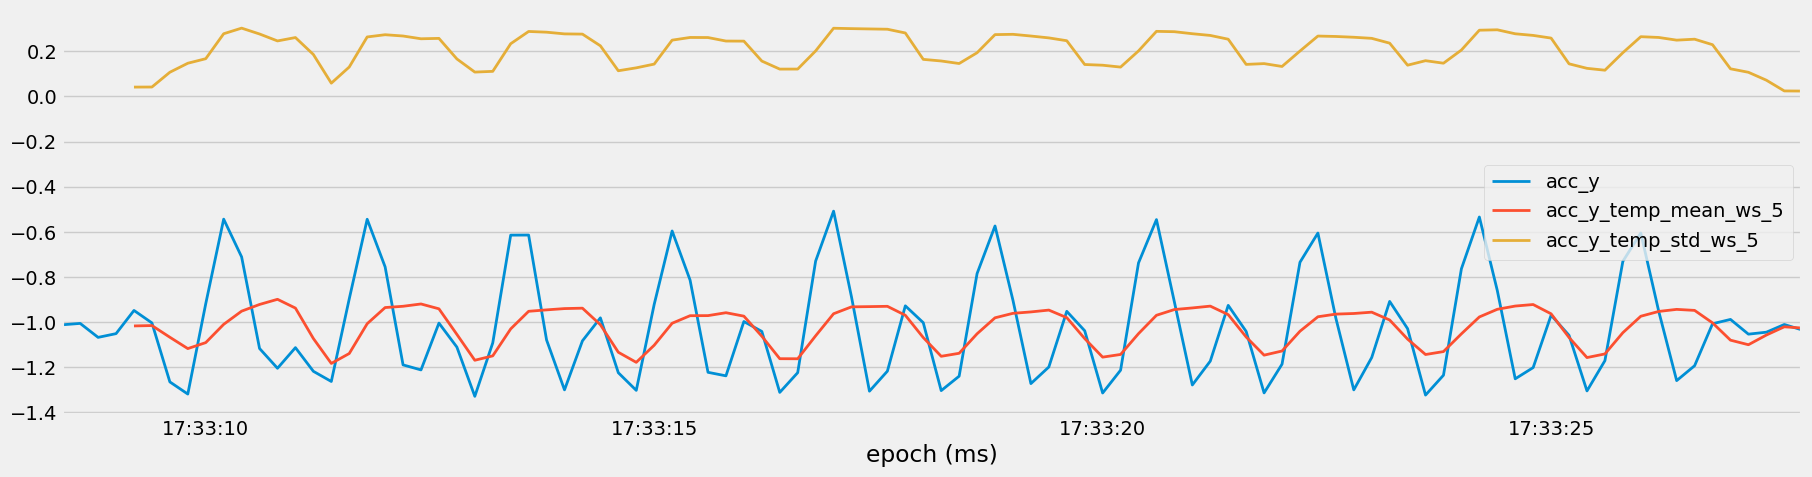

In [42]:
subset[["acc_y","acc_y_temp_mean_ws_5","acc_y_temp_std_ws_5"]].plot()

<Axes: xlabel='epoch (ms)'>

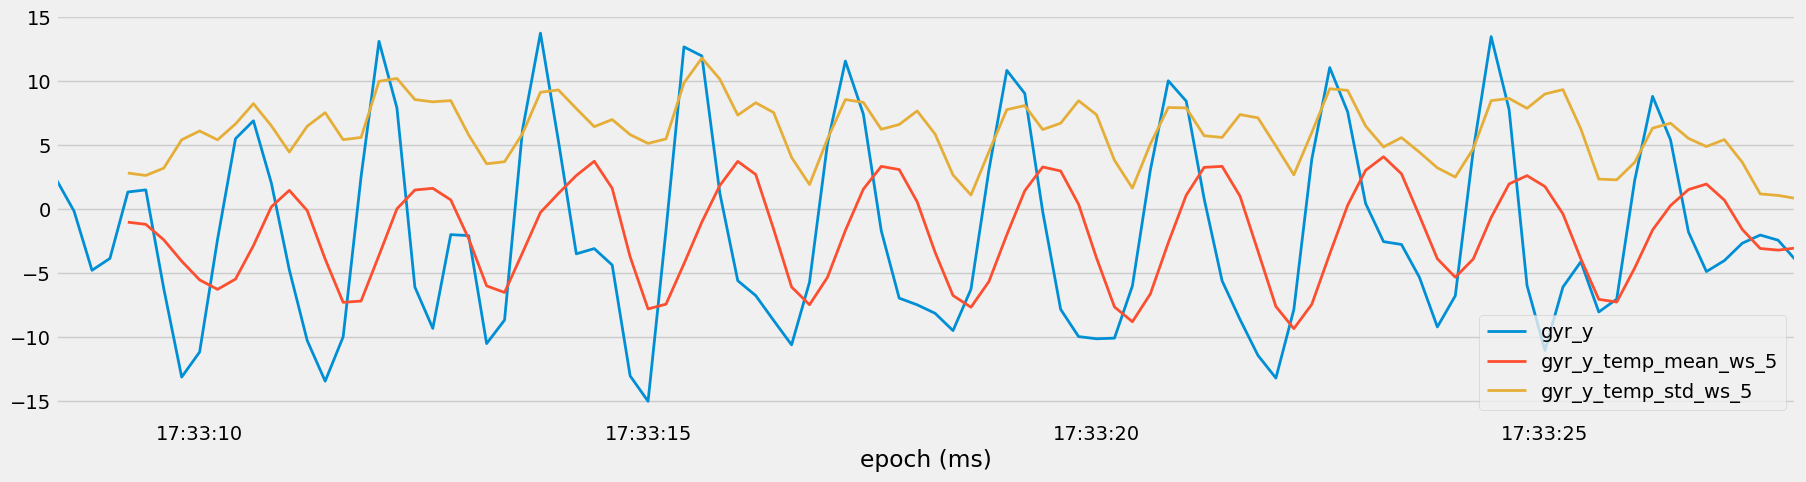

In [43]:
subset[["gyr_y","gyr_y_temp_mean_ws_5","gyr_y_temp_std_ws_5"]].plot()

# Frequency Features

In [44]:
df_freq = df_temporal.copy().reset_index()
FreqAbs = FourierTransformation()

In [45]:
print(df_freq.columns)


Index(['epoch (ms)', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'participant', 'label', 'category', 'set', 'pca_1', 'pca_2', 'pca_3',
       'acc_r', 'gyr_r', 'acc_x_temp_mean_ws_5', 'acc_x_temp_std_ws_5',
       'acc_y_temp_mean_ws_5', 'acc_y_temp_std_ws_5', 'acc_z_temp_mean_ws_5',
       'acc_z_temp_std_ws_5', 'gyr_x_temp_mean_ws_5', 'gyr_x_temp_std_ws_5',
       'gyr_y_temp_mean_ws_5', 'gyr_y_temp_std_ws_5', 'gyr_z_temp_mean_ws_5',
       'gyr_z_temp_std_ws_5', 'acc_r_temp_mean_ws_5', 'acc_r_temp_std_ws_5',
       'gyr_r_temp_mean_ws_5', 'gyr_r_temp_std_ws_5'],
      dtype='object')


In [46]:
fs = int(1000/200)
ws = int(2800/200)

In [47]:
df_freq = FreqAbs.abstract_frequency(df_freq,['acc_y'],ws,fs)

In [48]:
df_freq.columns

Index(['epoch (ms)', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'participant', 'label', 'category', 'set', 'pca_1', 'pca_2', 'pca_3',
       'acc_r', 'gyr_r', 'acc_x_temp_mean_ws_5', 'acc_x_temp_std_ws_5',
       'acc_y_temp_mean_ws_5', 'acc_y_temp_std_ws_5', 'acc_z_temp_mean_ws_5',
       'acc_z_temp_std_ws_5', 'gyr_x_temp_mean_ws_5', 'gyr_x_temp_std_ws_5',
       'gyr_y_temp_mean_ws_5', 'gyr_y_temp_std_ws_5', 'gyr_z_temp_mean_ws_5',
       'gyr_z_temp_std_ws_5', 'acc_r_temp_mean_ws_5', 'acc_r_temp_std_ws_5',
       'gyr_r_temp_mean_ws_5', 'gyr_r_temp_std_ws_5', 'acc_y_max_freq',
       'acc_y_freq_weighted', 'acc_y_pse', 'acc_y_freq_0.0_Hz_ws_14',
       'acc_y_freq_0.357_Hz_ws_14', 'acc_y_freq_0.714_Hz_ws_14',
       'acc_y_freq_1.071_Hz_ws_14', 'acc_y_freq_1.429_Hz_ws_14',
       'acc_y_freq_1.786_Hz_ws_14', 'acc_y_freq_2.143_Hz_ws_14',
       'acc_y_freq_2.5_Hz_ws_14'],
      dtype='object')

In [49]:
len(df_freq.columns)

43

<Axes: >

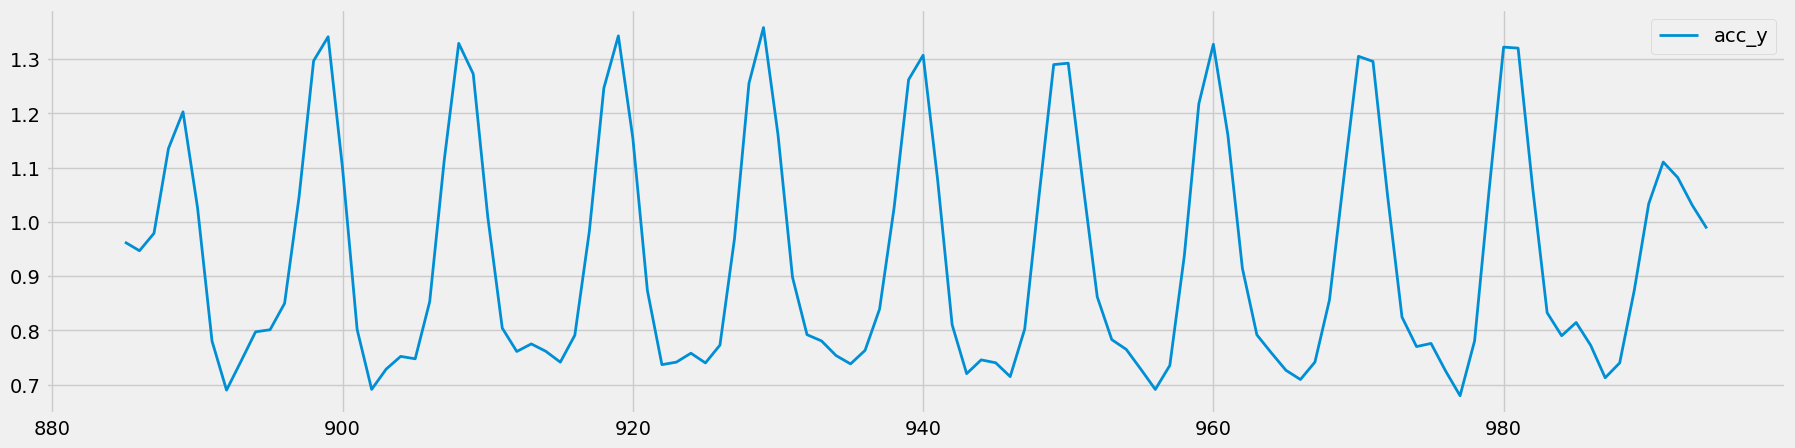

In [50]:
subset = df_freq[df_freq["set"] == 15]
subset[["acc_y"]].plot()

<Axes: >

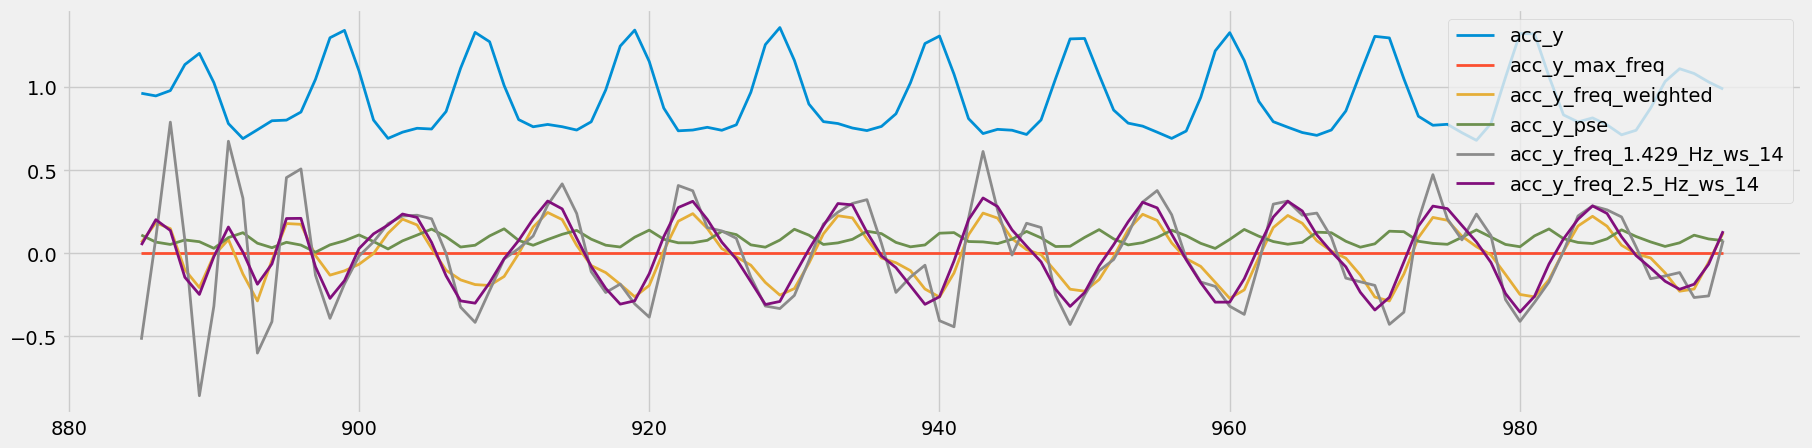

In [51]:
subset[["acc_y","acc_y_max_freq",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14"
       ]].plot()

In [52]:
df_freq_list=[]
for s in df_freq["set"].unique():
    print(f"After Applying Fourier Transformation to set {s}")
    subset = df_freq [df_freq["set"] == s ].reset_index(drop = True).copy()
    subset = FreqAbs.abstract_frequency(subset,predictor_columns,ws,fs)
    df_freq_list.append(subset)
    
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)" , drop = True)

After Applying Fourier Transformation to set 30
After Applying Fourier Transformation to set 1
After Applying Fourier Transformation to set 31
After Applying Fourier Transformation to set 3
After Applying Fourier Transformation to set 9
After Applying Fourier Transformation to set 32
After Applying Fourier Transformation to set 10
After Applying Fourier Transformation to set 33
After Applying Fourier Transformation to set 11
After Applying Fourier Transformation to set 34
After Applying Fourier Transformation to set 35
After Applying Fourier Transformation to set 15
After Applying Fourier Transformation to set 36
After Applying Fourier Transformation to set 16
After Applying Fourier Transformation to set 37
After Applying Fourier Transformation to set 17
After Applying Fourier Transformation to set 27
After Applying Fourier Transformation to set 38
After Applying Fourier Transformation to set 28
After Applying Fourier Transformation to set 29
After Applying Fourier Transformation to se

In [53]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


# Dealing with Overlapping Windows

In [54]:
df_freq = df_freq.dropna()


In [55]:
df_freq = df_freq[::2]

In [56]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


In [57]:
df_cluster = df_freq.copy()

In [58]:
df_cluster

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


# Clustering

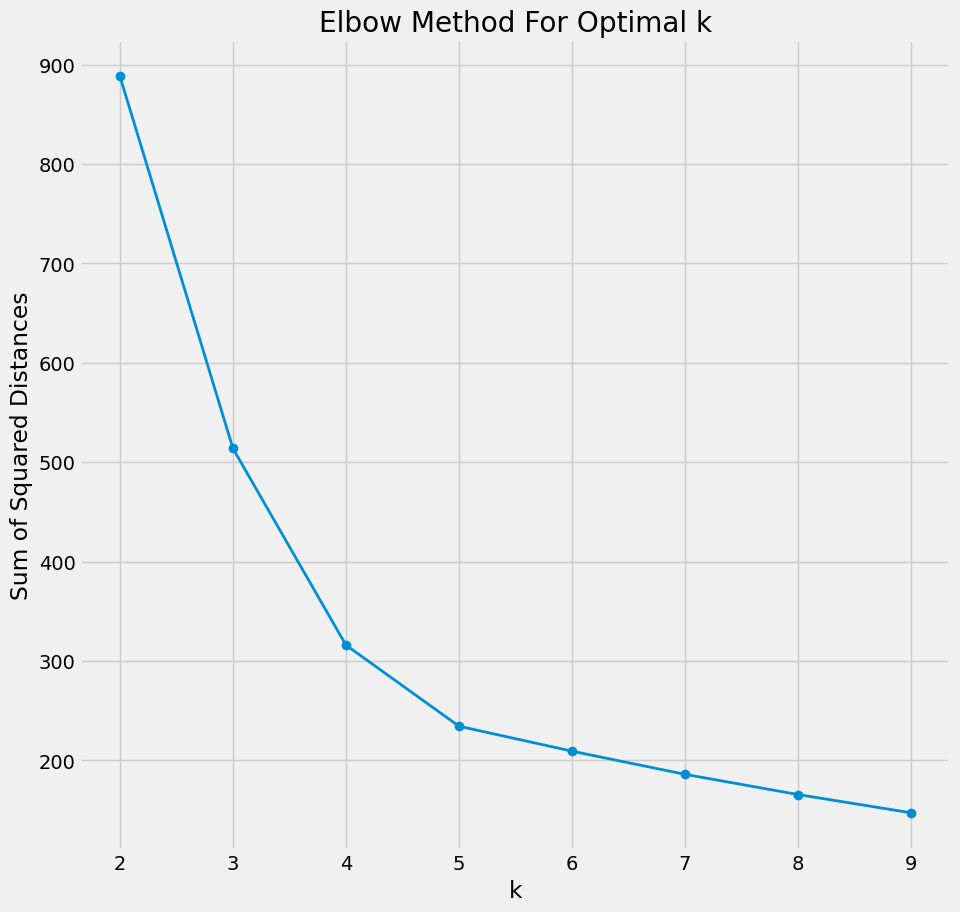

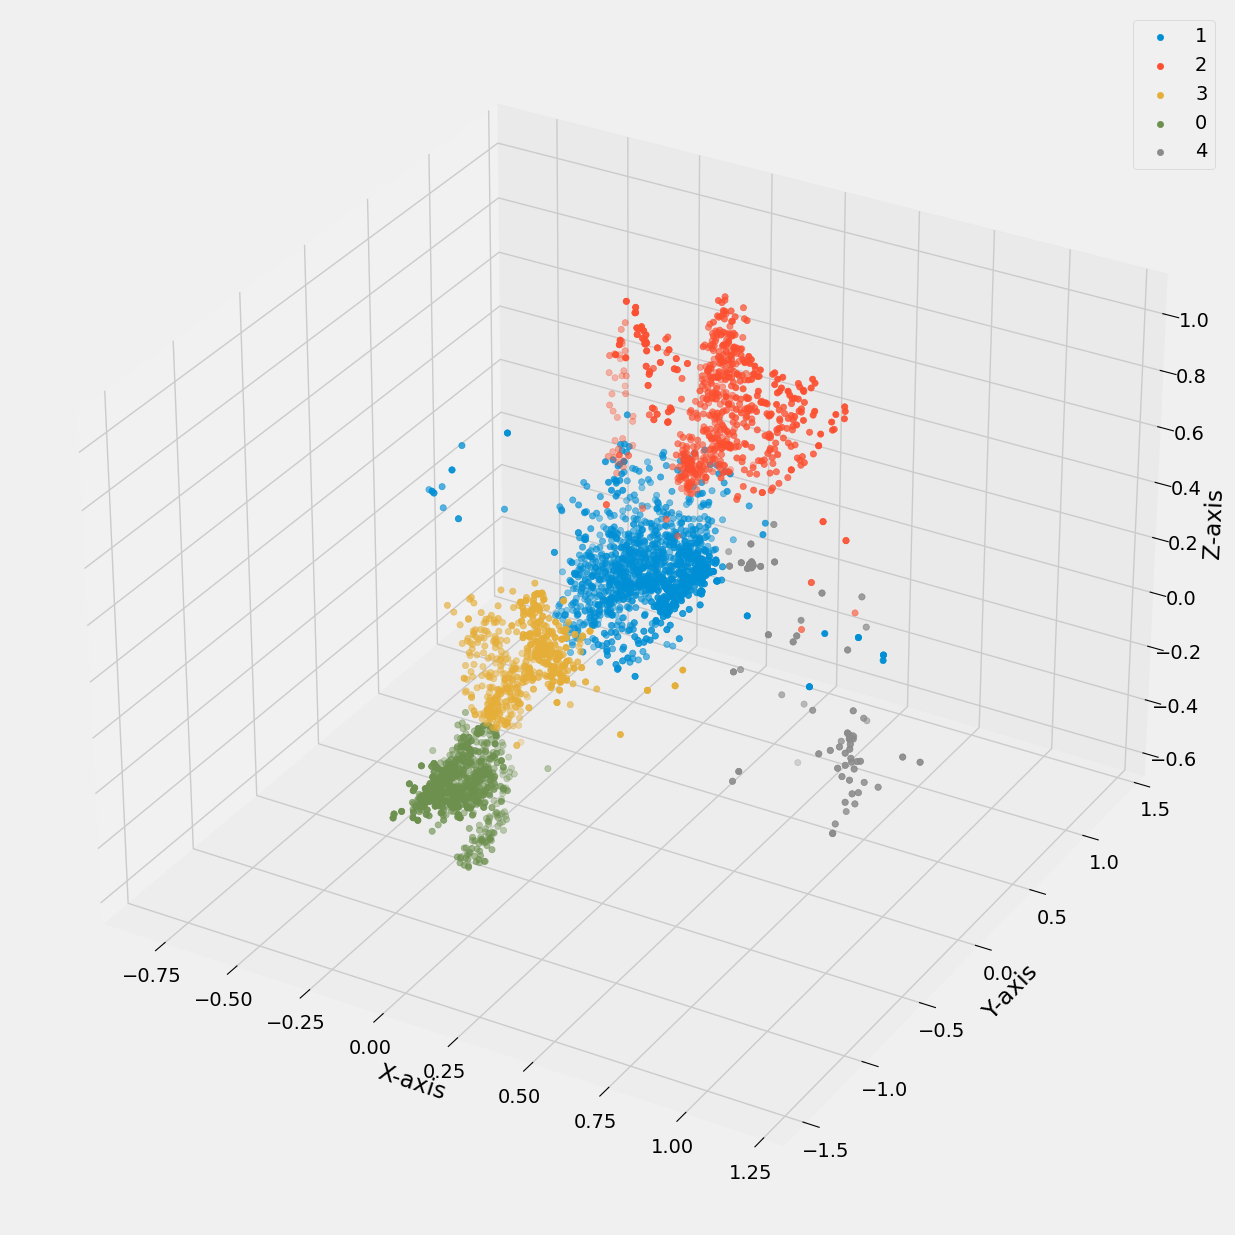

In [59]:

cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10)
inertias = []

# Calculate inertias for different values of k
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method For Optimal k")
plt.show()

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)
subset = df_cluster[cluster_columns]
df_cluster["cluster"] = kmeans.fit_predict(subset)

# Plot the clusters in a 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=c)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

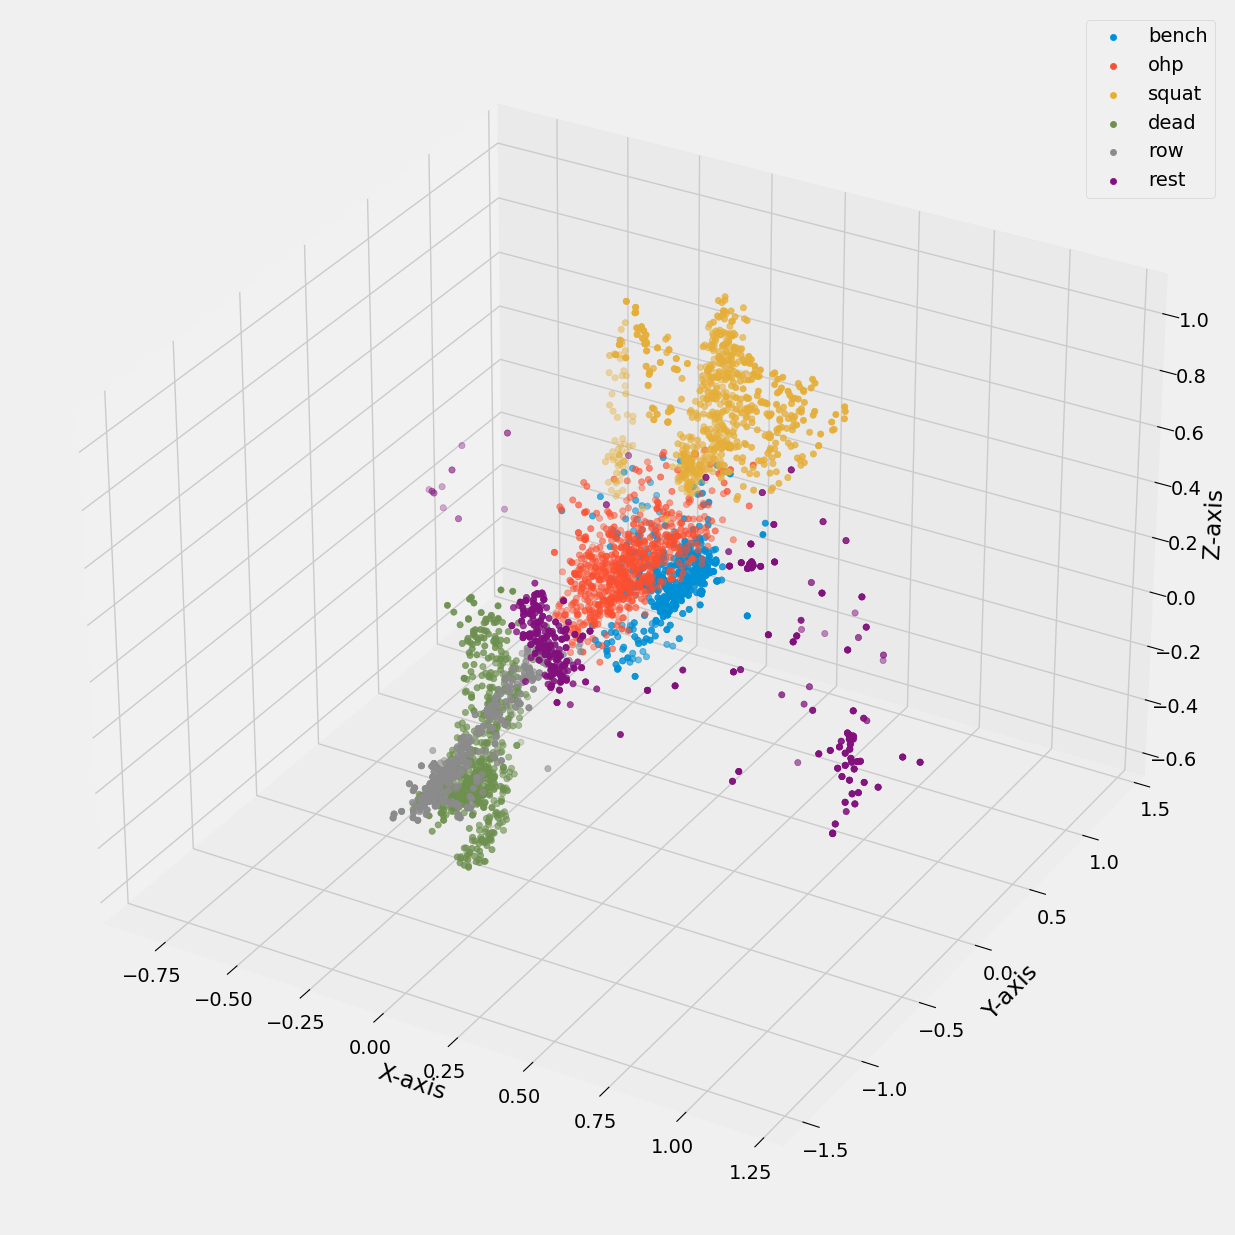

In [60]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for l in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"] == l]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=l)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

# Exporting the Data

In [61]:
df_cluster.to_pickle("interin/03_data_features.pkl")

In [62]:
df_cluster.to_csv("processed_csv/03_data_features.csv")